<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 1: Define the problem or question (Answer)
Identify the subject matter and the given or obvious questions that would be relevant in the field.

<font color='maroon'>The subject matter is blood donation and is a subset of medical applications of data science.</font>
## Potential Questions
List the given or obvious questions.
 - <font color='maroon'>Is a first time donor likely to donate again?</font>
 - <font color='maroon'>If a donor doesn't donate for a period of time (say 12 months), are they likely to ever donate again?</font>

## Actual Question
Choose the **one** question that should be answered.
 - <font color='maroon'>Has the person donated blood in March 2007 based on our knowledge of recency, time between donations and donation size?</font>

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

The dataset can be found here: https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center

## Information

To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build a FRMTC model, we selected 748 donors at random from the donor database. These 748 donor data, each one included R (Recency - months since last donation), F (Frequency - total number of donation), M (Monetary - total blood donated in c.c.), T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). 

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [45]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



In [4]:
# Read data in pandas
df = pd.read_csv(r"C:\Users\OmarZazou\OneDrive - Ediom Pty Ltd\Documents\Resources\Data Science Course\Course Material\DATA\transfusion.data")
# Check data has loaded correctly
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent the absence of data)

In [5]:
# Perform EDA by investigating each of the points above
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


We have 4 features and all features are of integers data type. There are no null values.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency (months),748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency (times),748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary (c.c. blood),748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time (months),748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
whether he/she donated blood in March 2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


All features are in the 10^1 scale while the Monetary (cc blood) is in the 10^3 scale. We will now have a look at the outliers.

Text(0.5, 0.98, 'Features Boxplots')

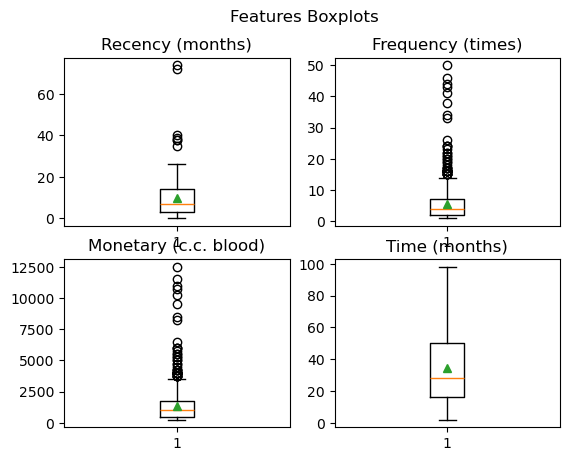

In [23]:
fig, axs = plt.subplots(2,2)
axs[0,0].boxplot(df['Recency (months)'], showmeans=True)
axs[0,0].set_title('Recency (months)')
axs[0,1].boxplot(df['Frequency (times)'], showmeans=True)
axs[0,1].set_title('Frequency (times)')
axs[1,0].boxplot(df['Monetary (c.c. blood)'], showmeans=True)
axs[1,0].set_title('Monetary (c.c. blood)')
axs[1,1].boxplot(df['Time (months)'], showmeans=True)
axs[1,1].set_title('Time (months)')
fig.suptitle('Features Boxplots')

We can see that Recency, Frequency and Monetary all have high outliers. We will now attempt to quantify these outliers better.

In [30]:
df[df['Recency (months)'] > (14+1.5*(14-2.75))].value_counts().sum()

7

In [31]:
df[df['Frequency (times)'] > (7+1.5*(7-2))].value_counts().sum()

45

In [32]:
df[df['Monetary (c.c. blood)'] > (1750+1.5*(1750-500))].value_counts().sum()

45

In [33]:
df[df['Time (months)'] > (50+1.5*(50-16))].value_counts().sum()

0

We have 45 outliers for Frequency and Monetary and we have 7 outliers for Recency.

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

In [34]:
# Filter/subset/clean the data according to your EDA findings
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated_Mar_2007']
df.head()

,Recency,Frequency,Monetary,Time,Donated_Mar_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In order to make the column names more readable and easy to use, we change the column names to remove any units.

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 6: Modelling (Answers)
Refer to the Problem and Main Question.
- What are the input variables (features)?
    1. <font color='maroon'>Recency</font>
    1. <font color='maroon'>Frequency</font>
    1. <font color='maroon'>Monetary</font>
    1. <font color='maroon'>Time</font>
- Is there an output variable (label)? <font color='maroon'> Yes</font>
- If there is an output variable:
    - What is it?<font color='maroon'> The output variable is whether they donated in March 2007.</font>
    - What is its type? <font color='maroon'> It is a categorical output variable which is binary (True/1 or False/0).</font>
- What type of Modelling is it?
    - [X] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [X] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [35]:
features = ['Recency', 'Frequency', 'Monetary', 'Time']
outcome = 'Donated_Mar_2007'

In [71]:
# Split your data
X = df[features]
y = df[outcome].astype(str).copy()

In [72]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 748 entries, 0 to 747
Series name: Donated_Mar_2007
Non-Null Count  Dtype 
--------------  ----- 
748 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


Since the 0 value occurs a lot less than 1, we need to startify the split data based on y to ensure we have a representation of the value 0 in the training data.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [264]:
# Choose a model or models
rfc = RandomForestClassifier(random_state=1, n_estimators=200, max_features=0.5, max_depth=20, min_samples_leaf=5)

# Step 9: Fit the Model

In [265]:
# Fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=0.5, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [266]:
# Evaluate model against training set
y_train_prob = rfc.predict(X_train)

print(classification_report(y_train, y_train_prob))
print(accuracy_score(y_train, y_train_prob))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       428
           1       0.73      0.42      0.53       133

    accuracy                           0.83       561
   macro avg       0.78      0.69      0.71       561
weighted avg       0.81      0.83      0.81       561

0.8253119429590018


In [267]:
print(confusion_matrix(y_train, y_train_prob))

[[407  21]
 [ 77  56]]


In [268]:
fpr, tpr, _ = roc_curve(y_train.astype(int), y_train_prob.astype(int))
roc_auc = auc(fpr, tpr)

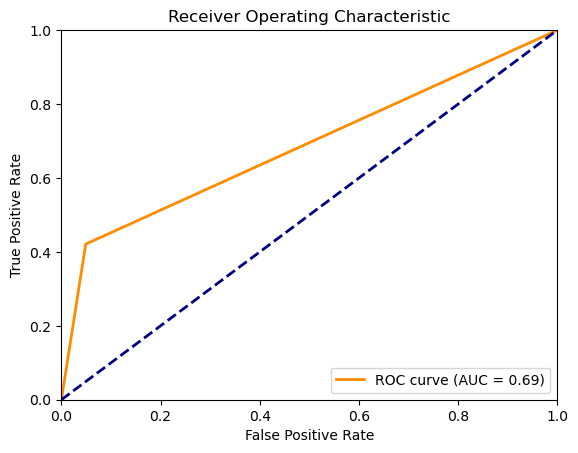

In [269]:
plt.plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [270]:
# Evaluate model against test set
y_test_prob = rfc.predict(X_test)

print(classification_report(y_test, y_test_prob))
print(accuracy_score(y_test, y_test_prob))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       142
           1       0.61      0.38      0.47        45

    accuracy                           0.79       187
   macro avg       0.72      0.65      0.67       187
weighted avg       0.77      0.79      0.77       187

0.7914438502673797


In [271]:
print(confusion_matrix(y_test, y_test_prob))

[[131  11]
 [ 28  17]]


In [272]:
fpr, tpr, _ = roc_curve(y_test.astype(int), y_test_prob.astype(int))
roc_auc = auc(fpr, tpr)
roc_auc

0.6501564945226916

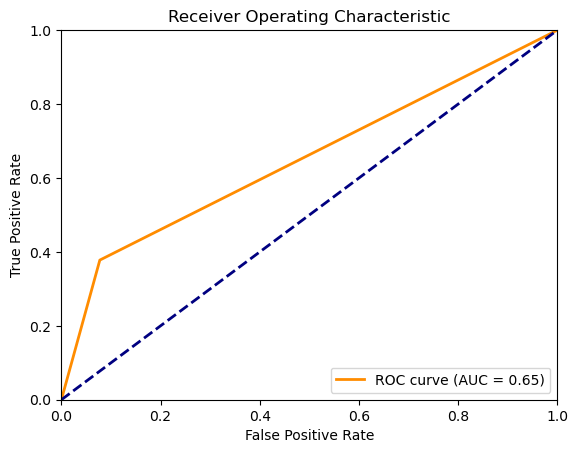

In [273]:
plt.plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

After testing multiple paramaters of the Random Forest Classifier model, the following parameters seem to have the best effect in terms of reducing overfitting and producing a relatively accurate model:
- Number of estimators =  200 (number of trees in the forest)
- maxiumm features = 0.5 (maxium features used to consider best split, in this case calculated as 2 which is the half of the features)
- maximum depth = 20 (maximum depth of the tree)
- minimum samples leaf = 5 (minimum number of samples required to be at a leaf node)

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

## Answer

The model can be use dto predict whether a person made a donation in March 2007 based on the given features with about 80% accuracy.

>

>

>



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



